### Implementing Batch GD

In [205]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

plt.style.use("dark_background")

In [206]:
# Generating dataset
X,y= make_regression(n_samples=1000, n_features=20,n_informative=20,noise=10)
X.shape, y.shape

# Normalisation
u = np.mean(X, axis=0)
std = np.std(X, axis=0)

X = (X-u)/std

In [207]:
# Preprocessing
m = X.shape[0]
ones = np.ones((m,1))

X = np.hstack((ones, X))
X.shape

(1000, 21)

In [208]:
# Defining functions for Batch Gradient Descent
def hypothesis(X, theta):
    return np.dot(X, theta)

def error(X, y, theta):

    e = 0.0
    m = X.shape[0]

    y_ = hypothesis(X, theta)
    e = np.sum((y - y_)**2)

    return e/m

def gradient(X, y, theta):

    y_ = hypothesis(X, theta)
    grad = np.dot(X.T, y_ - y)
    m = X.shape[0]
    return grad/m

def batch_gradient_descent(X, y, learning_rate = 0.01, max_steps = 300):

    m, n = X.shape
    theta = np.zeros((n,))
    error_list = []

    for _ in range(max_steps):
        # Batch Gradient -> Complete data set at once

        e = error(X, y, theta)
        error_list.append(e)

        grad = gradient(X, y, theta)
        theta -= learning_rate*grad

    return theta, error_list


In [209]:
theta, error_list = batch_gradient_descent(X, y)

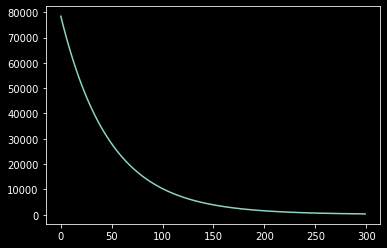

In [210]:
plt.plot(error_list)

As can be seen, the error drops from 70k to saturation in 250+ steps

### Implementing Mini Batch GD

In [211]:
# Defining functions for Mini Batch Gradient Descent

def mini_batch_gradient_descent(X, y, learning_rate = 0.01, max_steps = 100, batch_size = 50):

    error_list=[]
    all_error_list = []
    theta=np.zeros((X.shape[1],))

    data=np.hstack((X,y.reshape(-1,1)))

    for _ in range(max_steps):
        np.random.shuffle(data)
        m=data.shape[0]

        total_batches=m//batch_size

        for i in range(total_batches):

            batch_data=data[i*batch_size:(i+1)*batch_size]

            X_batch = batch_data[:,:-1]
            y_batch = batch_data[:,-1]

            batch_gradient=gradient(X_batch,y_batch,theta)

            theta = theta - learning_rate*batch_gradient

            err = error(X_batch,y_batch,theta)
            all_error_list.append(err)

        e = error(X_batch, y_batch, theta)
        error_list.append(e)
            
    return theta, error_list, all_error_list

In [212]:
theta, error_list, all_error_list = mini_batch_gradient_descent(X, y)

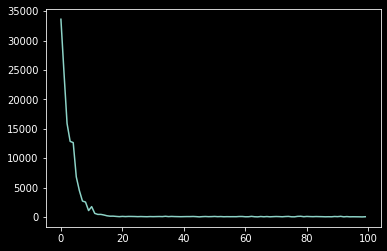

In [213]:
plt.plot(error_list)
plt.show()

In [214]:
error_list

[33624.60148869348,
 24562.42870131968,
 15917.18038508266,
 12886.283598034392,
 12673.52975791584,
 6852.039258267358,
 4531.57844575541,
 2757.903223951994,
 2578.5413143906844,
 1132.02497367303,
 1805.0164171660645,
 662.2977686262988,
 482.165215061824,
 484.8682923789254,
 381.4292256636804,
 249.28441182217975,
 180.24179379317698,
 187.03758484305942,
 140.50221833090174,
 102.94910218745254,
 143.35825577665935,
 112.66202582548684,
 139.4573811820409,
 134.66284610303882,
 124.05108657129561,
 101.45239858268134,
 119.76645815600756,
 101.6887354847793,
 89.99632598431228,
 115.9607728187098,
 101.9132615800938,
 114.21932774243872,
 125.2396208305738,
 110.09878476184964,
 163.1545332133216,
 108.85715425270797,
 138.35523541179455,
 115.56783951323591,
 104.53521294112903,
 92.9207265148778,
 105.3649391086915,
 113.82385651539755,
 112.76578729269494,
 130.70836603459168,
 104.62455863570477,
 63.976463412582426,
 103.30046080904334,
 125.73041552594741,
 97.1956349815529

We see, we get the saturation in $\leq$ 20 steps!!

For a better noisy graph, with more data points having all iterations of theta

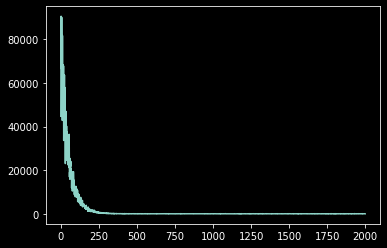

In [215]:
plt.plot(all_error_list)
plt.show()

We can see that updates are noisy, but we get faster convergence

#### For stochastic, we put batch_size = 1

In [216]:
theta, error_list, all_error_list = mini_batch_gradient_descent(X, y, batch_size=1)

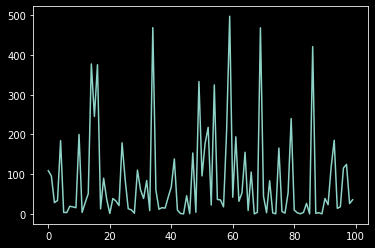

In [217]:
plt.plot(error_list)
plt.show()

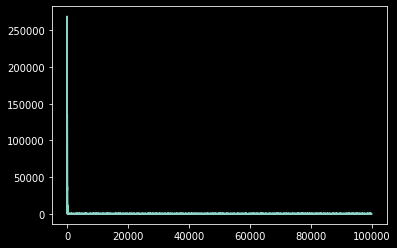

In [218]:
plt.plot(all_error_list)
plt.show()

Here we get almost converged data at 0th itself, this is popular in Deep Learning